<a href="https://colab.research.google.com/github/said-mk/ML-Projects/blob/main/TF102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FashionMNIST Classification using Tensorflow

## Module Used

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data Loading and Preprocessing

In [ ]:
data = tf.keras.datasets.fashion_mnist

(train_images, train_label), (test_images, test_label) = data.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Data Exploration

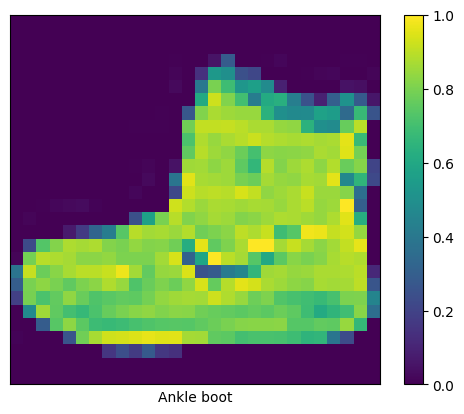

In [ ]:
plt.imshow(train_images[0])
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[train_label[0]])
plt.colorbar()

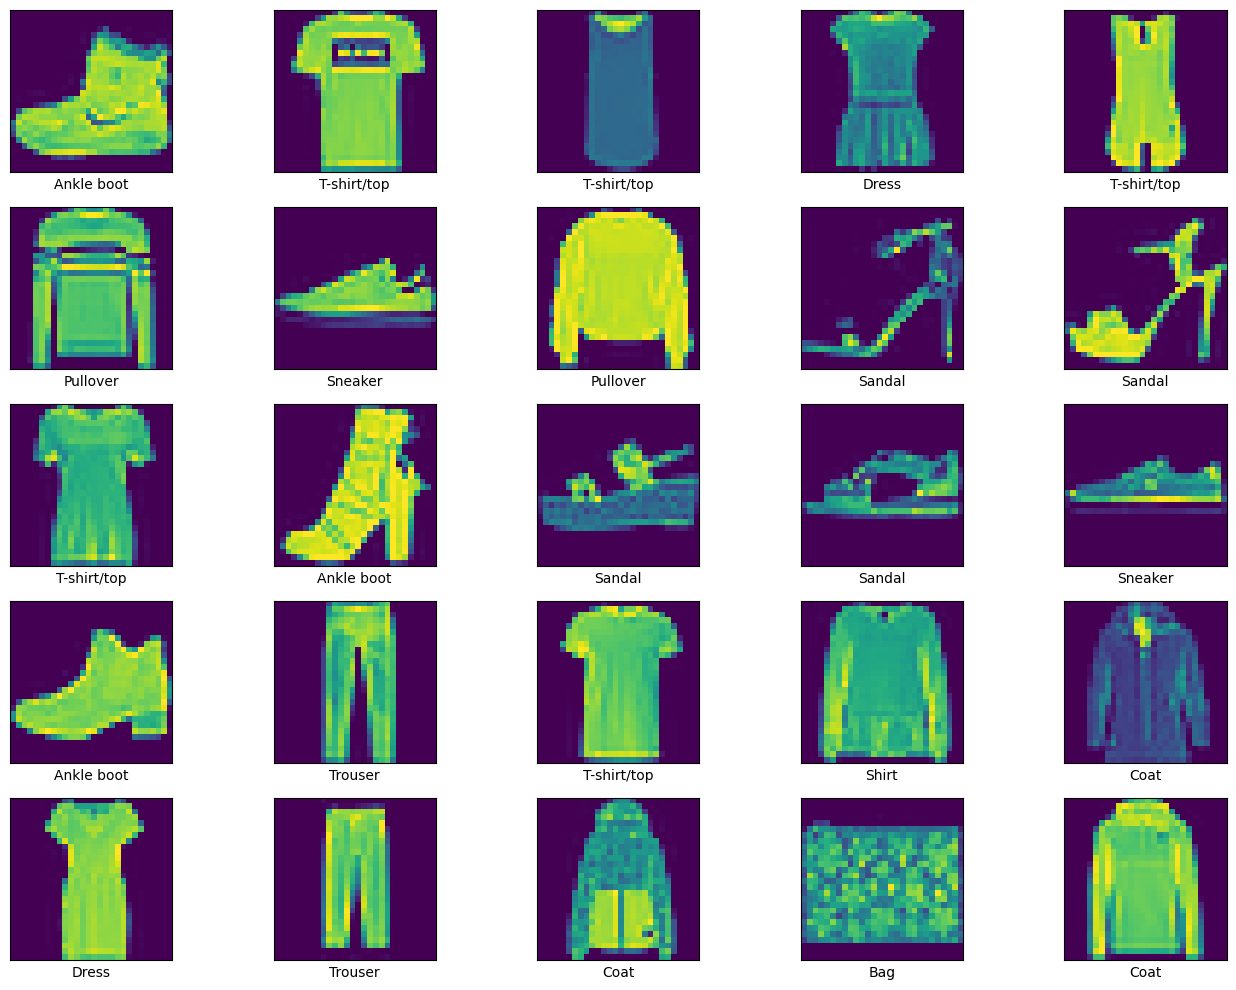

In [ ]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[train_label[i]])
  plt.imshow(train_images[i])

plt.tight_layout()
plt.show()

## Builiding the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10)

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="sgd", loss=loss_fn, metrics=["accuracy"])
model.fit(train_images, train_label, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6405 - loss: 1.1042
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7996 - loss: 0.5962
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8205 - loss: 0.5247
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8314 - loss: 0.4898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8377 - loss: 0.4614


## Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_label)

print(f"\ntest loss:{test_loss}")
print(f"test_accuracy:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8424 - loss: 0.4433

test loss:0.44839227199554443
test_accuracy:0.8406000137329102


## Prediction Model

In [ ]:
prob_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])

## Prediction Visualizations

In [ ]:
def show_image(img,prediction_array,true_labels,i, class_names=class_names):
  if prediction_array.shape[0]==1:
    i= 0
    true_label = true_labels
  else:
    true_label = true_labels[i]
  prediction =  np.argmax(prediction_array[i])
  img = img[i]
  confidence = 100 * np.max(prediction_array)

  color = "green" if true_label==prediction else "red"

  plt.imshow(img,cmap="gray")
  plt.xlabel(f"{class_names[true_label]}",fontsize=14)
  plt.title(f"predicted:{class_names[prediction]}: {confidence :.2f}%",color=color)
  plt.xticks([])
  plt.yticks([])


def plot_value_array(true_label,prediction_array,i):
  if prediction_array.shape[0]==1:
    i = 0
    true_label= true_label

  else:
    true_label = true_label[i]

  prediction = np.argmax(prediction_array[i])
  pred_prob = prediction_array[i]

  bar_plt = plt.bar(range(10),pred_prob,color="#123456")
  plt.xlabel("Classes")
  plt.yticks([])
  plt.xticks(range(10))
  plt.ylim([0,1])

  bar_plt[true_label].set_color("green")
  if prediction != true_label:
    bar_plt[prediction].set_color("red")

  plt.title("Prediction probability")




In [ ]:
def visualize_prediction(img,prediction_array,true_label,class_names,num_rows,num_cols):
    num_images = num_rows*num_cols
    total_cols = 2*num_cols

    plt.figure(figsize=(3*total_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows,total_cols,(2*i)+1)
      show_image(img,prediction_array,true_label,i)
      plt.subplot(num_rows,total_cols,(2*i)+2)
      plot_value_array(true_label, prediction_array, i)



## Predictions

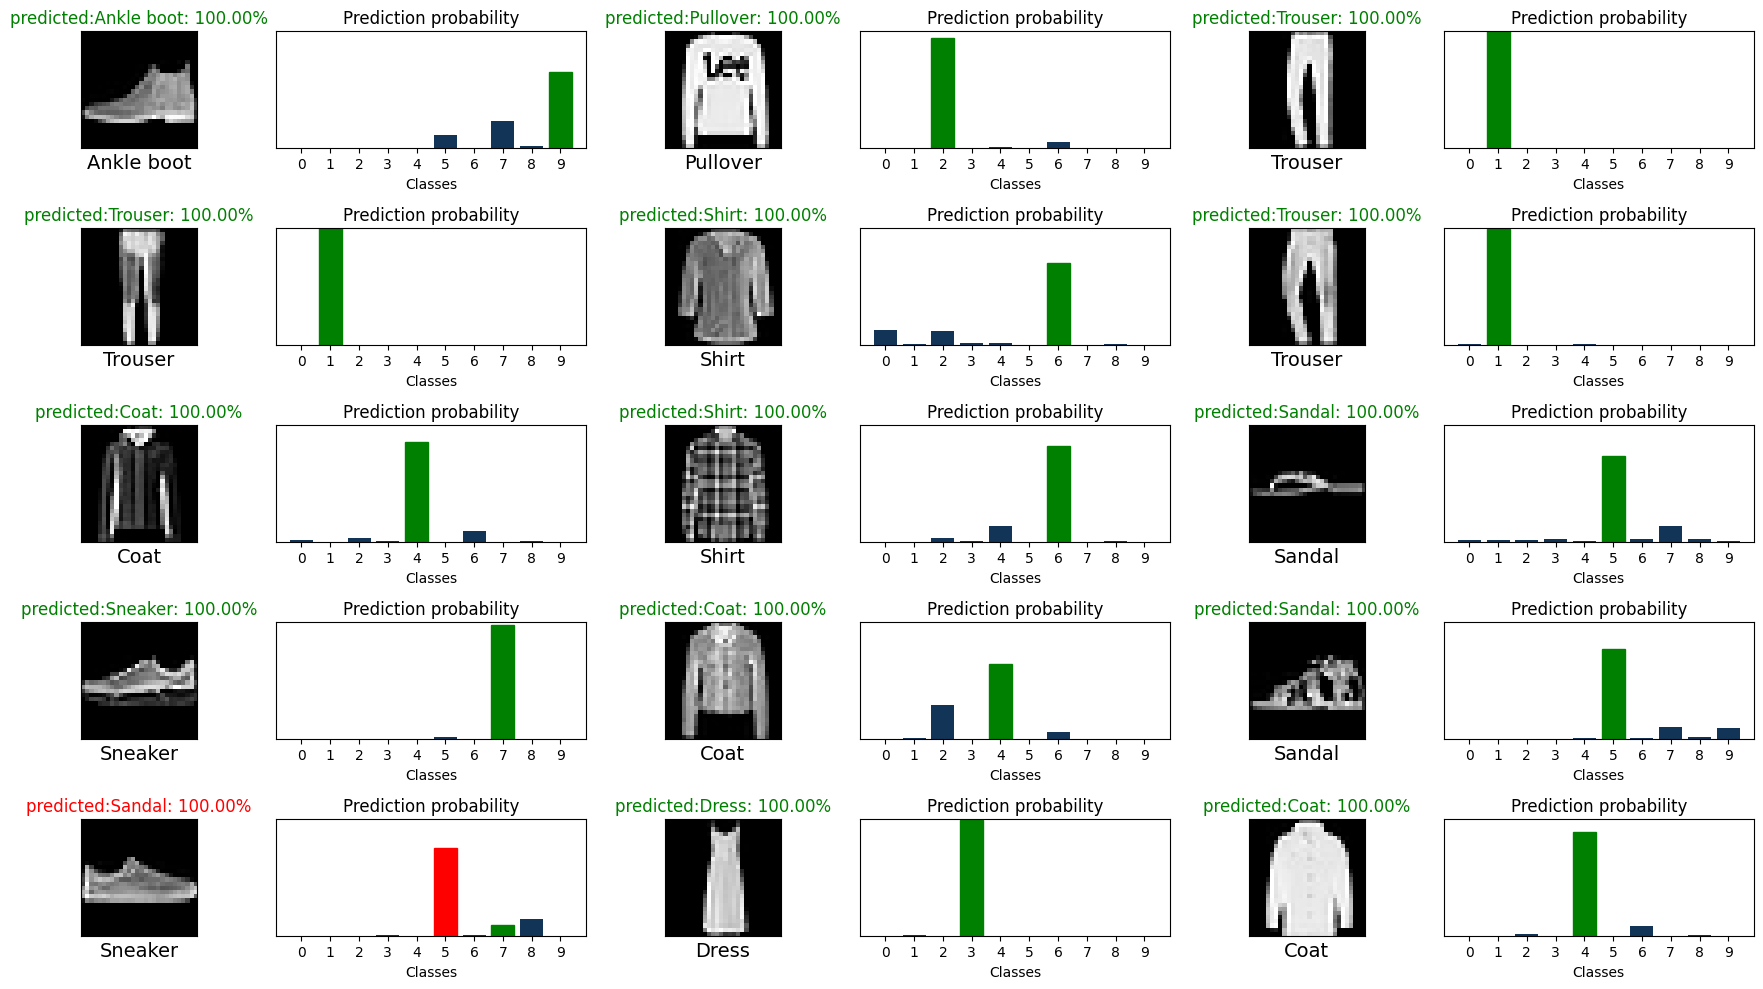

In [ ]:
test_prob = prob_model(test_images)
visualize_prediction(test_images,test_prob,test_label,class_names,5,3)
plt.tight_layout()
plt.show()

In [ ]:
img_len = len(test_images)
idx = np.random.randint(img_len)
print(f"Image index:{idx}")

Image index:7324


## Random Model Test

In [ ]:
test_img = test_images[idx]
test_img_label = test_label[idx]
test_img = np.expand_dims(test_img,0)

pred_img = prob_model.predict(test_img)
pred_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.01504242, 0.00844991, 0.01138742, 0.02280482, 0.00901048,
        0.85786057, 0.03250353, 0.01893576, 0.02148197, 0.00252312]],
      dtype=float32)

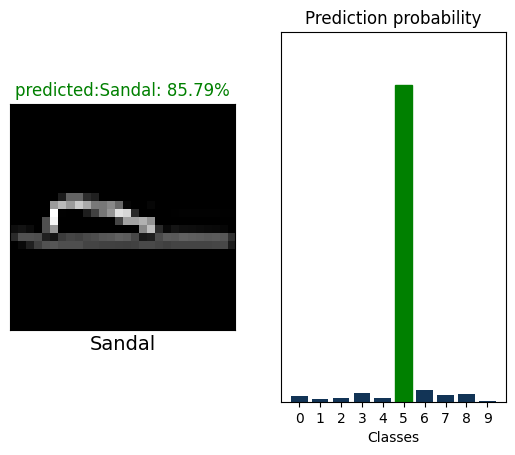

In [ ]:
plt.subplot(1,2,1)
show_image(test_img,pred_img,test_img_label,idx)
plt.subplot(1,2,2)
plot_value_array(test_label[idx],pred_img,idx)
